# Publication Plots for the Partition Problem

In [1]:
using HDF5, Printf
using LsqFit, Measurements

using PyCall, PyPlot
np = pyimport("numpy")
h5py = pyimport("h5py")
PyPlot.plt.style.use("../paper.mplstyle")

In [6]:
# path to folder with the h5 files
PATH_DB = "/home/lappet/Dropbox/MidnightRambler/Mean_Field_AOA/Figures/Data/NP_problem/new/"
PATH = "../data/number-partitioning/"

"../data/number-partitioning/"

## Plots

### Average Energy

#### Tim

In [92]:
p = 10000
num_instances = 10000
seed = 137;

In [180]:
X = 10:2:20;
X = vcat(X, [50, 60, 70]);

In [181]:
E_star_data = []
for N in X
    new_file = "number-partitioning_" * "p_" * string(p) * "_N_" * string(N) * "_num_inst_" * string(num_instances) * "_seed_" * string(seed) * ".h5"
    data_file = h5open(PATH_DB * new_file, "r")
    println(new_file)
    E_star_sqrt = read(data_file, "E_star_sqrt")[1]
    push!(E_star_data, E_star_sqrt)
end

number-partitioning_p_10000_N_10_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_12_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_14_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_16_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_18_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_20_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_50_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_60_num_inst_10000_seed_137.h5
number-partitioning_p_10000_N_70_num_inst_10000_seed_137.h5


In [182]:
m(x, p) = p[1] .+ p[2] .* x
p0 = [0., -0.5];

In [183]:
fit_E = curve_fit(m, log.(X), log.(E_star_data), p0)    
println(fit_E.resid .|> abs |> sum)    
println(fit_E.param)

0.08059008024500702
[1.1184144438277142, -1.9010774872922707]


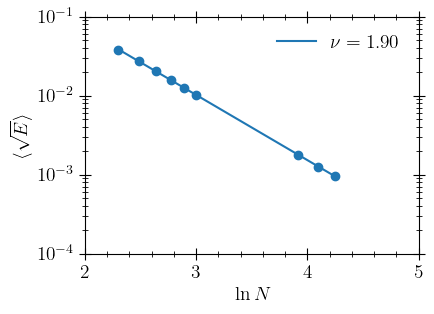

In [187]:
fig = figure(figsize=(4.2, 3))
ax = subplot(111)
ax.plot(X .|> log, E_star_data, "o")
ax.plot(X .|> log, map(x -> m(x, [fit_E.param[1], fit_E.param[2]]), log.(X)) .|> exp, "-C0", label=@sprintf("\$ \\nu = %.2f \$", fit_E.param[2] |> abs))
ax.set_xlabel("\$\\ln N\$")
ax.set_ylabel("\$\\langle\\sqrt{E}\\rangle\$")
ax.set_yscale("log")
ax.set_xlim(2, 5)
ax.set_ylim(1e-4, 1e-1)
ax.legend()

tight_layout(pad=0.15, w_pad=0.0, h_pad=0.0)
savefig(PATH_DB * "Fig5.pdf", dpi=300)

### Histograms

In [ ]:
using Statistics, Distributions

#### Plots

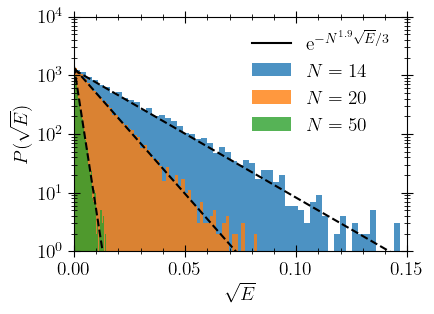

In [188]:
colors = ["C0", "C1", "C2", "C3"];

fig = figure(figsize=(4.2, 3))
ax = subplot(111)
for (k, N) in enumerate([14, 20, 50])
    new_file = "number-partitioning_" * "p_" * string(p) * "_N_" * string(N) * "_num_inst_" * string(num_instances) * "_seed_" * string(seed) * "_all_E_stars.h5"
    data_file = h5open(PATH_DB * new_file, "r")
    all_E_stars = read(data_file, "all_E_stars")
    counts, bins = np.histogram(all_E_stars, bins=100)    
    hist(bins[1:end-1], bins, weights=(counts), lw=1.5, label=@sprintf("\$N=%2d\$", N), color=colors[k], alpha=0.8)#, histtype="step")
    plot(bins[1:end-1], map(x -> counts[1]*exp.(-N^1.9 * x / 3), bins[1:end-1]), "--k")
end
plot([], [], c="k", label="\$\\mathrm{e}^{-N^{1.9} \\sqrt{E} / 3}\$")
legend(loc="upper right", ncol=1)
ax.set_yscale("log")
ax.set_xlim(0, 0.15)
ax.set_ylim(1e0, 1e4)
ax.set_xlabel("\$\\sqrt{E}\$")
ax.set_ylabel("\$ P(\\sqrt{E})\$")
tight_layout(pad=0.15, w_pad=0.0, h_pad=0.0)
savefig(PATH_DB * "Fig6.pdf", dpi=300)

In [85]:
N = 20 # 
# N = 12 
# N = 14 # 18

20

In [86]:
new_file = "number-partitioning_" * "p_" * string(p) * "_N_" * string(N) * "_num_inst_" * string(num_instances) * "_seed_" * string(seed) * "_all_E_stars.h5"
data_file = h5open(PATH_DB * new_file, "r")
all_E_stars = read(data_file, "all_E_stars")
counts, bins = np.histogram(all_E_stars, bins=100)

([1341, 1166, 1034, 864, 743, 636, 550, 454, 411, 359  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1.7881393432617188e-7, 0.0014218194430189513, 0.0028434600721035765, 0.004265100701188202, 0.005686741330272827, 0.0071083819593574515, 0.008530022588442078, 0.009951663217526703, 0.011373303846611327, 0.012794944475695952  …  0.1293694760606352, 0.13079111668971985, 0.13221275731880447, 0.1336343979478891, 0.1350560385769737, 0.13647767920605836, 0.13789931983514297, 0.1393209604642276, 0.14074260109331221, 0.14216424172239683])

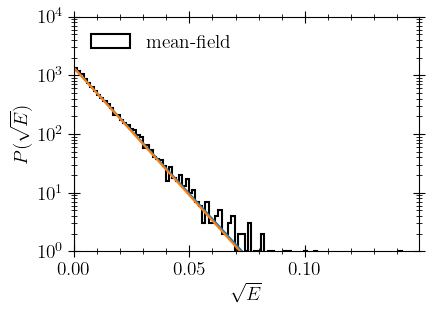

In [90]:
X = np.linspace(-6, 5, 101)

fig = figure(figsize=(4.2, 3))
ax = subplot(111)
hist(bins[1:end-1], bins, weights=(counts), alpha=1.0, lw=1.5, color="k", label="mean-field", histtype="step")
plot(bins[1:end-1], map(x -> counts[1]*exp.(-N^1.9 * x / 3), bins[1:end-1]))
plot(bins[1:end-1], map(x -> counts[1]*exp.(-N^2 * x / 4), bins[1:end-1]))
legend(loc="upper left", ncol=1)
ax.set_yscale("log")
ax.set_xlim(0, )
ax.set_ylim(1e0, 1e4)
ax.set_xlabel("\$\\sqrt{E}\$")
ax.set_ylabel("\$ P(\\sqrt{E})\$")
tight_layout(pad=0.15, w_pad=0.0, h_pad=0.0)
# savefig(PATH_DB * "Fig2.pdf", dpi=256)

## Testing